# Crash Course in Generative AI
## How to train our own bot with limited device?
as chatgpt and more generative ai come to worlds  have you ever think about how they do that and could me made one by ourselves?<br>
Lets break down to it




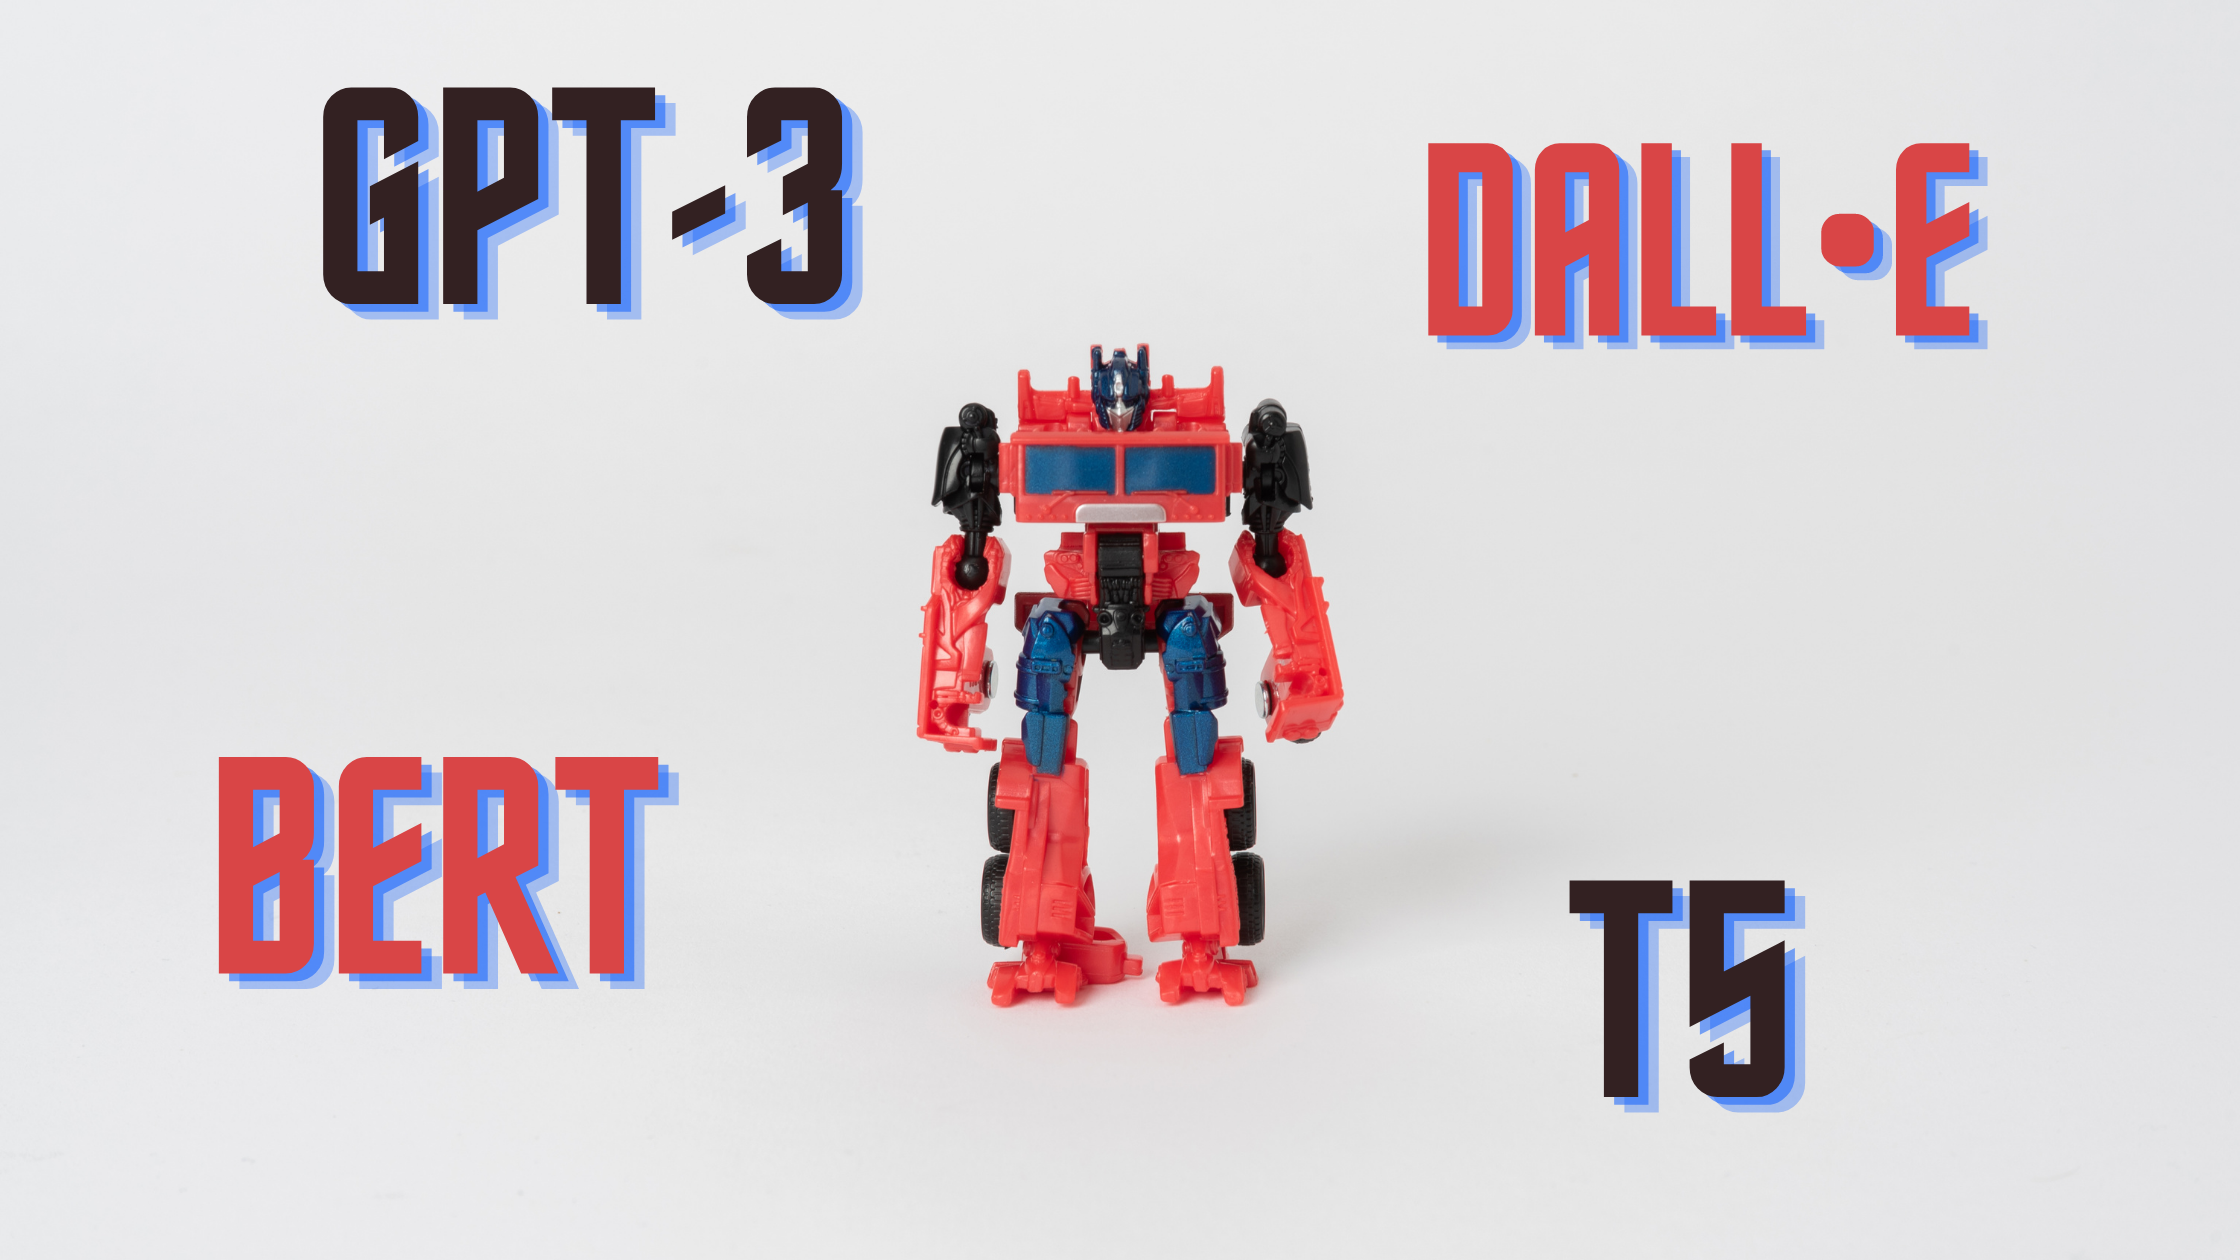

# Transformer
transformer is what this kind of LLM useing for, So what is Transformer models?<br>
<br>
Transformer models are a type of neural network architecture first introduced in the 2017 paper "Attention is All You Need" by Vaswani et al. They revolutionized natural language processing by enabling more efficient training on larger datasets and better capturing of long-range dependencies in text.
Here are the key components and characteristics of transformer models

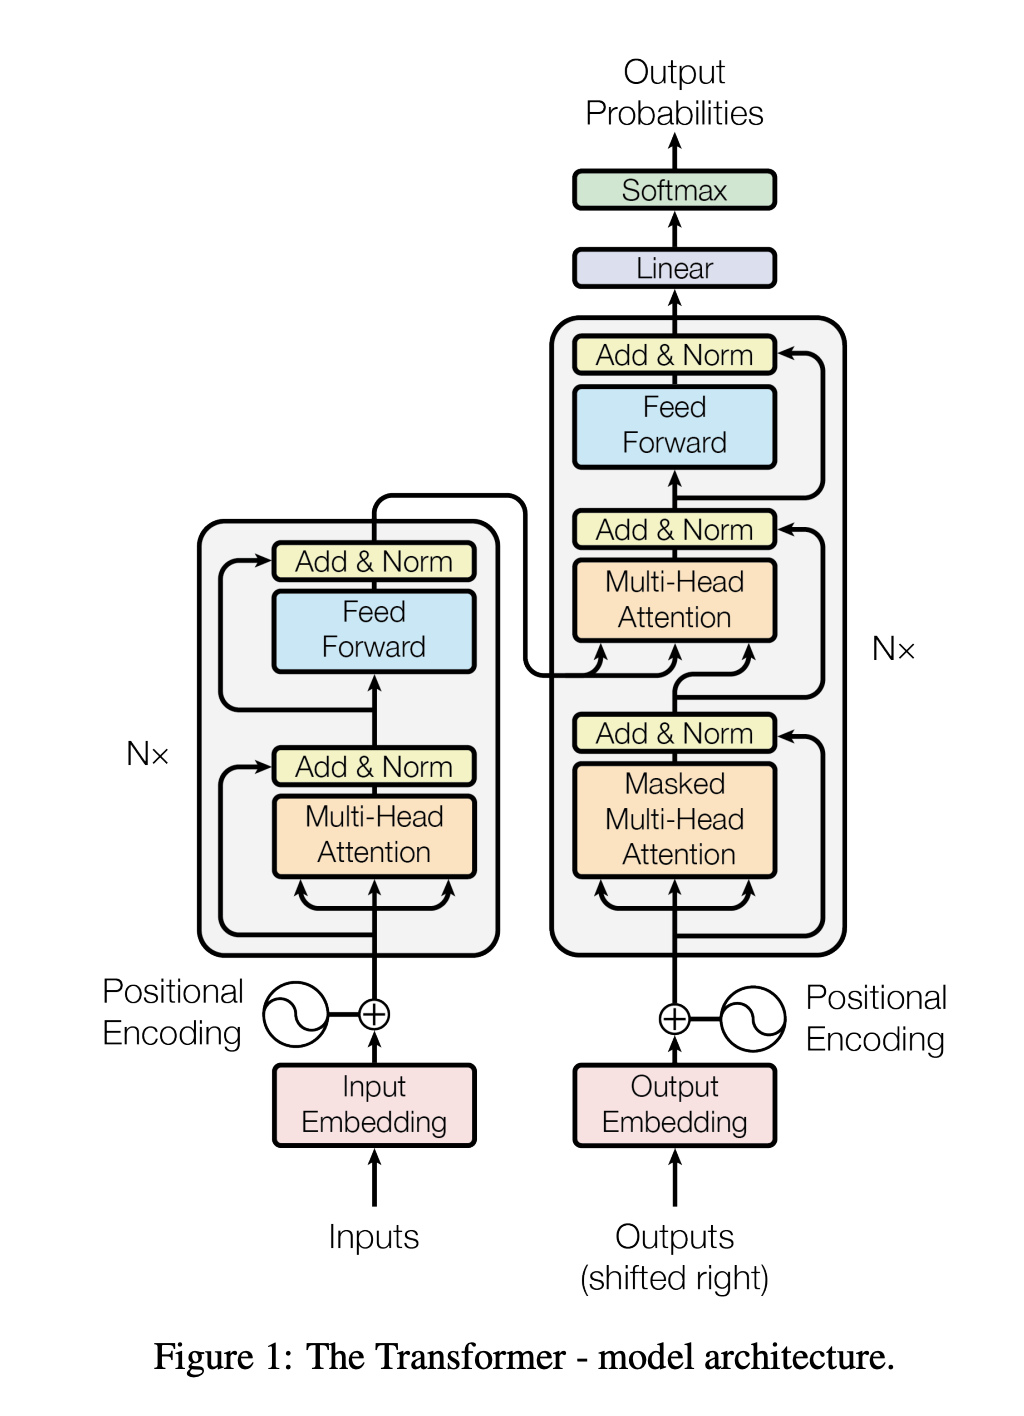

It 's a little difficult to understand at the first glance right? <br>
Don't worry, let's break down first we should know that what's is the inputs and the outputs<br>
the inputs is the words that we enter into the model like the words we give to the bot and the output is the words that the model output<br>
the whole process is to train the model to give out the output as we want

## High level look up
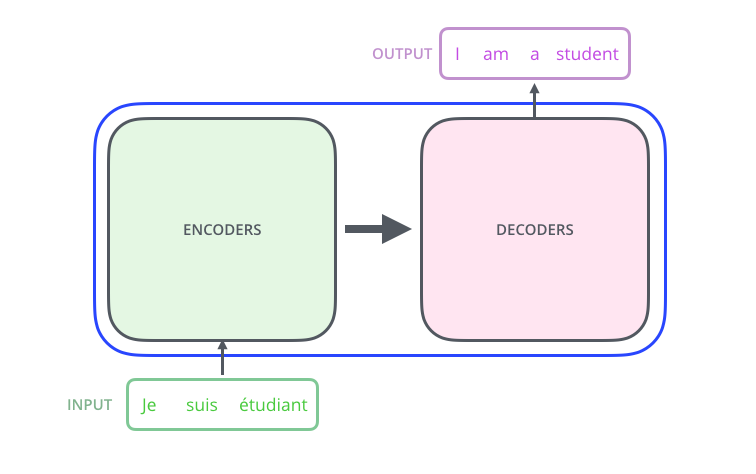

## Inputs Embedding


In a Transformer model, the first step in processing input data is the embedding layer. The embedding layer maps discrete input tokens (such as words or subwords) into continuous dense vectors, which can be processed by the model.

There are two main types of embeddings in the Transformer architecture:

- **Token Embeddings**:  
  Each input token is assigned a learnable vector representation. These embeddings capture semantic similarities between different tokens. For example, words like "cat" and "dog" would have embeddings that are closer together in vector space compared to unrelated words.

- **Positional Embeddings**:  
  Since Transformers do not have a built-in notion of sequence order (unlike RNNs), positional embeddings are added to token embeddings to encode the position of each token in the sequence. These are either learned or defined using fixed functions (e.g., sine and cosine functions).

$$
\text{PE}(pos, 2i) = \sin\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
$$

$$
\text{PE}(pos, 2i+1) = \cos\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
$$
where:
- \( pos \) is the position of the token in the sequence (starting from 0).
- \( i \) is the dimension index.
- \(d_model ) is the dimensionality of the embedding vector.

The intuition behind this formulation is:
- Tokens at similar positions have similar positional encodings.
- Different dimensions of the encoding capture different granularities of position.

The final input to the Transformer is the sum of the **Token Embedding** and the **Positional Encoding**:

$$
\text{Input Vector} = \text{Token Embedding} + \text{Positional Encoding}
$$
Now we got the inputs that the machine would recogenize



## Self-Attention

Self-Attention is the core mechanism of the Transformer architecture, allowing each token in the input sequence to dynamically attend to all other tokens. This mechanism enables the model to capture dependencies regardless of their distance in the sequence.

At a high level, for each input token, the model computes a weighted sum of all token embeddings, where the weights represent how much "attention" should be paid to each other token.

The Self-Attention mechanism involves three main components:

- **Query (Q)**: Represents the current token seeking information.
- **Key (K)**: Represents the content of each token.
- **Value (V)**: Represents the actual content to be aggregated.

Each input embedding \( x \) is projected into these three vectors through learned linear transformations:

$$
Q = xW^Q,\quad K = xW^K,\quad V = xW^V
$$

where:
- \( W^Q \), \( W^K \), and \( W^V \) are learned weight matrices.







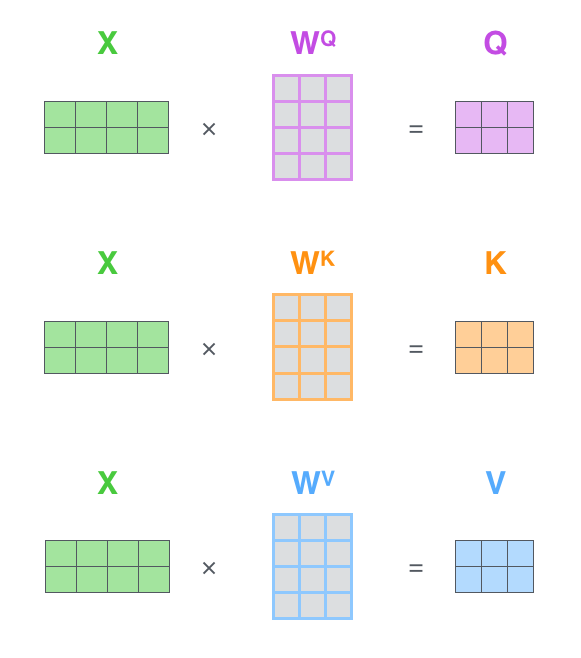

## Breaking into the martix
### Input matrix x
We assum that the input of our word is 2 and our words Embedding is 4 so we got 2 X 4 matrix
### Weight matrices
As we assum our (d-model) is 3 and words Embedding is 4 so the  weight matrices is 4 X 3 matrix
### real world example
The d-model and the words Embedding length could be very larg for example 768 X 768 and our parameters needs to update is 768 X 768 X 3 which is 1,769,472


The attention scores are calculated by:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

where:
- \( d_k \) is the dimensionality of the key vectors, used to scale the dot products.



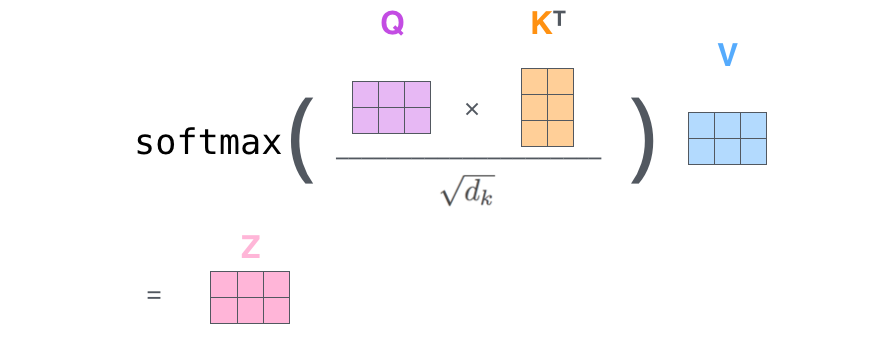

## LoRA Technology in Transformer

Low-Rank Adaptation (LoRA) is a lightweight fine-tuning technique designed to efficiently adapt large pre-trained models like Transformers to new tasks without updating all model parameters.

### Motivation

Transformers are composed of millions or even billions of parameters, especially in the linear projection layers of the attention mechanism (e.g., \( W^Q \), \( W^K \), \( W^V \)). Fine-tuning all these parameters for a downstream task is computationally expensive and requires substantial memory resources.

LoRA addresses this challenge by introducing a small number of trainable parameters while keeping the original pre-trained weights frozen. This dramatically reduces the computational and storage overhead during fine-tuning.

### How LoRA Works

Instead of directly fine-tuning the original weight matrices (such as \( W^Q \) and \( W^V \)), LoRA decomposes the update into two smaller matrices:

$$
\Delta W = B A
$$

We assum the orginal W is $$ W = 768 × 768$$
Which has 589,824 parameter needs to update <br>
and now we want to update it with tow small matrix A and B<br>
Assume:
- Hidden size \( d = 768 \)
- LoRA rank \( r = 8 \)<br>

down-projection matrix A
$$ A =8 × 768$$
which will make the input into 8 demension then <br>
up-projection matrix B
$$ B =768 × 8$$
which will make the input go back to 768 demension then <br>
and by mul $\Delta W$ will remain the same demension as before but with a low paramerter needs to be update


The updated weight during fine-tuning becomes:

$$
W' = W + \Delta W = W + BA
$$

where \( W \) remains frozen, and only \( A \) and \( B \) are updated during training.

where \( W \) remains frozen, and only \( A \) and \( B \) are updated during training.



Typically, LoRA is applied to the following parts of the Transformer architecture:
- **Query projection (\( W^Q \))**
- **Value projection (\( W^V \))**
- (Optionally) **Key projection (\( W^K \))** and **Feed-forward networks (FFN)**

By modifying only these critical submodules, LoRA achieves task-specific adaptation with minimal parameter updates.

### Matrix Size Comparison: Full Fine-tuning vs LoRA Fine-tuning

| Component | Shape | Number of Parameters | Purpose |
|:---|:---|:---|:---|
| Original Weight \( W \) (e.g., \( W^Q, W^K, W^V \)) | \( 768 × 768 \) | 589,824 | Full weight matrix for projection |
| LoRA Down Projection \( A \) | \( 8 × 768 \) | 6,144 | Projects from high-dimensional space to low-dimensional space |
| LoRA Up Projection \( B \) | \( 768 × 8 \) | 6,144 | Projects back from low-dimensional to high-dimensional space |
| **Total LoRA Parameters** (A + B) | - | **12,288** | Much smaller update compared to full fine-tuning |

**Key Insight**:
- Full fine-tuning requires updating ~590K parameters per projection matrix.
- LoRA fine-tuning only needs ~12K parameters per projection matrix.
- **Reduction Ratio**: Only about **2%** of the original parameters are trained!



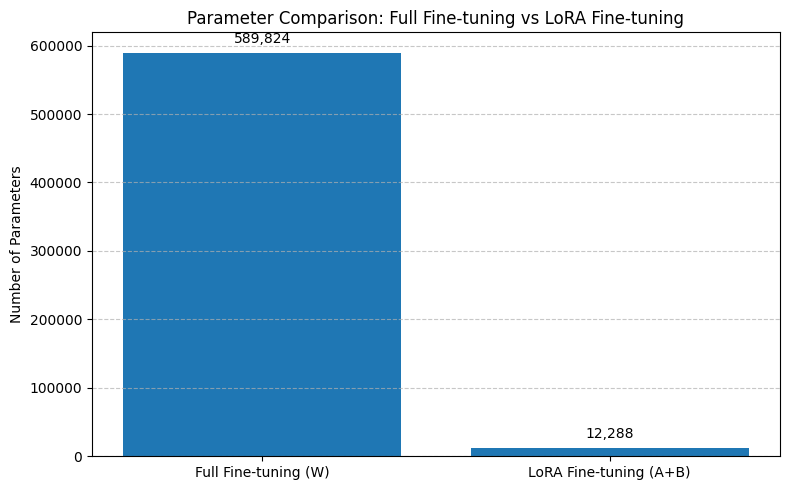

In [1]:
import matplotlib.pyplot as plt


labels = ['Full Fine-tuning (W)', 'LoRA Fine-tuning (A+B)']
values = [589824, 12288]


plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.title('Parameter Comparison: Full Fine-tuning vs LoRA Fine-tuning')
plt.ylabel('Number of Parameters')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(values):
    plt.text(i, v + 10000, f'{v:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



## Extensions and Exercises

## Exercise 1: Add Contextual Memory to the Alpaca Dataset

**Task**: Modify the second dataset (Alpaca-style) to include simulated conversation history. Design a prompt format that mirrors the persona-chat style.

**Goal**: Evaluate whether adding memory/history improves performance for instruction-following tasks.

**Solution**:
```python
# Example: Add a simple history context
df['history'] = df['instruction'].shift(1).fillna("")
df['formatted_prompt'] = "### History:\\n" + df['history'] + "\\n### Instruction:\\n" + df['instruction']


```
## Exercise 2: Compare Response Length and Quality

**Task**: Generate responses from both models on the same set of test prompts. Measure average response length and coherence.

**Goal**: Determine if persona/history-based training produces more elaborate or coherent answers than instruction-only training.

**Solution**:
```python
# Pseudo-code outline
prompts = ["How do I train a model?", "Tell me about your hobbies."]
responses_model1 = model1.generate(prompts)
responses_model2 = model2.generate(prompts)

# Compare lengths
avg_len1 = sum(len(r.split()) for r in responses_model1) / len(responses_model1)
avg_len2 = sum(len(r.split()) for r in responses_model2) / len(responses_model2)



## Exercise 3: Fine-Tuning Based on Suitability

**Task**: Fine-tune the base model (e.g., Meta-LLaMA-3.1-8B) using both datasets—one suited for multi-turn conversation (Synthetic-Persona-Chat) and one for instruction-following (Alpaca-Cleaned). Then evaluate each model on scenarios best aligned with its training.

**Goal**: Understand how dataset structure and context type affect performance in their "best-fit" use case.

---

### Step 1: Fine-Tune Two Versions of the Model

- **Model A**: Trained on **Synthetic-Persona-Chat**
  - Suitable for chatbot or agent-style roles.
  - Trained with persona, multi-turn history, and user input.
- **Model B**: Trained on **Alpaca-Cleaned**
  - Suitable for task execution, tutoring, and single-turn QA.
  - Trained with instruction + input (no memory).

---

### Step 2: Create Two Evaluation Sets

| Evaluation Set | Description                                  | Example Prompt                              |
|----------------|----------------------------------------------|---------------------------------------------|
| Chatbot        | Multi-turn, open-ended, memory-dependent     | "What did we talk about earlier?"           |
| Task Solver    | Instructional, one-shot problem solving       | "Summarize this paragraph in one sentence." |

---

### Step 3: Evaluate Each Model on Both Sets

```python
def evaluate_model(model, prompts):
    results = []
    for p in prompts:
        result = model.generate(p)
        results.append(result)
    return results

chatbot_prompts = ["Hey, remember me?", "Tell me a story like before."]
task_prompts = ["Explain binary search.", "Convert 32°F to Celsius."]

chatbot_results_A = evaluate_model(model_A, chatbot_prompts)
task_results_B = evaluate_model(model_B, task_prompts)


### Advantages of LoRA in Transformers

- **Parameter Efficiency**: Only a tiny fraction of the model parameters are trained.
- **Reduced Computational Cost**: Smaller memory footprint and faster fine-tuning.
- **Preserves Pretrained Knowledge**: The frozen original weights ensure that the model retains its general capabilities.
- **Composable**: Multiple LoRA modules can be applied and swapped dynamically for different tasks without retraining the full model.

### Summary

LoRA provides a highly efficient and practical approach for adapting large Transformer models to specialized tasks. By introducing low-rank updates in the self-attention layers and optionally in the feed-forward networks, LoRA achieves strong performance with a fraction of the computational resources required for full fine-tuning.


##Reference
Transformers, Explained: Understand the Model Behind GPT-3, BERT, and T5https://daleonai.com/transformers-explained<br>
The Illustrated Transformer  http://jalammar.github.io/illustrated-transformer/

# MIT License
Copyright (c) 2025 Yifan Yuan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.